## Imports {-}

In [1]:
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
import re
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
import spacy
nlp = spacy.load('en_core_web_sm')
all_stopwords = nlp.Defaults.stop_words
lemmatizer = WordNetLemmatizer()
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

from typing import List
import sys

sys.path.append('.')
import pandas as pd
import os

import string
from nltk.corpus import stopwords
from functools import reduce

In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import gensim
import gensim.corpora as corpora
import gensim.models

import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'/mallet-2.0.8'})
from gensim.models import CoherenceModel

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

from pprint import pprint

distutils: /Applications/anaconda3/include/python3.8/UNKNOWN
sysconfig: /Applications/anaconda3/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /Applications/anaconda3/include/python3.8/UNKNOWN
sysconfig: /Applications/anaconda3/include/python3.8
user = False
home = None
root = None
prefix = None


In [3]:
topic_modeling_df = pd.read_csv('/Users/JoKerry/Desktop/CSML1030 - Machine Learning Capstone/mimic_admissions_and_discharge/2 TFIDF/Discharge/mimic_data_discharge_for_tm.csv')
topic_modeling_df

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HADM_ID,SEQ_NUM,ICD9_CODE,CATEGORY,TEXT,AGE,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE_recalculated,ROW_ID_y,SUBJECT_ID,ADMISSION_TYPE
0,153714,1,5849,"['Echo', 'ECG', 'Discharge summary', 'Radiolog...",DISCHARGE DIAGNOSIS: \n\nDISCHARGE MEDICATIONS...,"[0, 51]",M,2108-05-25,NaN,NaN,NaN,0,51,29492,24136,EMERGENCY
1,174834,1,51881,"['Echo', 'ECG', 'Discharge summary', 'Radiolog...",DISCHARGE DIAGNOSIS: Primary: pseudomonal pneu...,"[56, 0, 2, 55]",F,2054-01-28,2113-04-21 00:00:00,NaN,2113-04-21 00:00:00,1,56,24932,20425,EMERGENCY
2,101463,1,5849,"['Discharge summary', 'ECG', 'Radiology', 'Echo']",DISCHARGE DIAGNOSIS: Urinary tract infection a...,[0],F,1856-12-22,NaN,NaN,NaN,0,300,58365,98040,EMERGENCY
3,123285,1,51881,"['Discharge summary', 'ECG', 'Nursing/other', ...",DISCHARGE DIAGNOSIS: Myasthenia [**Last Name (...,"[0, 70]",F,2062-09-14,NaN,NaN,NaN,0,70,11794,9644,EMERGENCY
4,115665,1,51881,"['Echo', 'ECG', 'Discharge summary', 'Radiolog...",DISCHARGE DIAGNOSIS: Congestive Heart Failure\...,"[0, 68, 69]",F,2072-09-27,2144-07-21 00:00:00,2144-07-21 00:00:00,2144-07-21 00:00:00,1,68,25514,20907,EMERGENCY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31972,179548,32,4019,"['Discharge summary', 'ECG', 'Echo']",DISCHARGE DIAGNOSIS: \n\nDISCHARGE MEDICATIONS...,"[0, 79]",M,2103-01-20,2182-10-22 00:00:00,2182-10-22 00:00:00,NaN,1,79,48580,67348,EMERGENCY
31973,133827,32,53081,"['Discharge summary', 'ECG', 'Radiology', 'Echo']",DISCHARGE DIAGNOSIS: CAD s/p Coronary artery B...,"[0, 73]",M,2121-01-10,2196-03-05 00:00:00,NaN,2196-03-05 00:00:00,1,73,48045,65659,ELECTIVE
31974,154989,32,53081,"['Echo', 'ECG', 'Discharge summary', 'Radiolog...",DISCHARGE DIAGNOSIS: acute rejection s/p cadav...,"[0, 61, 62]",M,2080-10-27,2142-10-12 00:00:00,2142-10-12 00:00:00,2142-10-12 00:00:00,1,61,30465,24955,EMERGENCY
31975,129551,36,4019,"['Discharge summary', 'ECG', 'Radiology', 'Echo']",DISCHARGE DIAGNOSIS: Expired\n\nDISCHARGE MEDI...,"[0, 51]",M,2108-12-14,2160-05-23 00:00:00,2160-05-23 00:00:00,2160-05-23 00:00:00,1,51,51769,77282,EMERGENCY


## Cleaning Text {-}

In [4]:
my_stop_words = ['discharge', 'diagnosis', 'medications', 'medication', 'disposition', 'condition', 'instructions', 
                 'status', 'secondary', 'changes', 'instruction', 'change', 'home', 'name', 'hospital', 'daily',
                'hour', 'follow', 'care', 'time', 'day', 'week', 'with', 'disp', 'discharged', 'admitted', 
                 'namepattern', 'none']

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
X = topic_modeling_df.TEXT

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    # Remove new line characters
    document = document.replace("\n", ' ')
    # Punctuation
    document = re.sub(r'[^\w\s]', ' ', document)
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    #Removing Numbers
    document = ''.join(i for i in document if not i.isdigit())
    #Removing Stopwords
    document = ' '.join([i for i in document.split() if not i in all_stopwords])
    #Removing certain sized words
    document = ' '.join([i for i in document.split() if len(i)>3])
    # Contractions
    document = contractions.fix(document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    #Removing my_stop_words
    document = ' '.join([i for i in document.split() if not i in my_stop_words])
    
    #return document
    documents.append(document)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
documents

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['lasix weigh everyday weighs pound tablet lasix last stitle weighs pound hold lasix last stitle pantoprazole sodium tablet delayed release tablet atorvastatin carvedilol coreg isosorbide mononitrate tablet sustained release imdur hydralazine good',
 'primary pseudomonal pneumonia albuterol actuation aerosol puff inhalation needed ipratropium bromide actuation aerosol four puff inhalation senna tablet tablet needed docusate sodium liquid hundred lansoprazole susp delayed release recon thirty oxazepam capsule capsule bedtime midazolam solution injection needed anxiety senna tablet tablet bisacodyl suppository suppository rectal bedtime fentanyl intravenous needed pain colace liquid twice heparin unit subcutaneous extended stable tracheostomy ventilator nutrition tolerating tube feed please notify caregiver trouble breathing feel feverish nauseated vomiting health concern extended',
 'urinary tract infection acute kidney injury rhabdomyolysis altered mental aspirin tablet delayed release

In [8]:
tokenized_words = [word_tokenize(i) for i in documents]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
tokenized_words

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['lasix',
  'weigh',
  'everyday',
  'weighs',
  'pound',
  'tablet',
  'lasix',
  'last',
  'stitle',
  'weighs',
  'pound',
  'hold',
  'lasix',
  'last',
  'stitle',
  'pantoprazole',
  'sodium',
  'tablet',
  'delayed',
  'release',
  'tablet',
  'atorvastatin',
  'carvedilol',
  'coreg',
  'isosorbide',
  'mononitrate',
  'tablet',
  'sustained',
  'release',
  'imdur',
  'hydralazine',
  'good'],
 ['primary',
  'pseudomonal',
  'pneumonia',
  'albuterol',
  'actuation',
  'aerosol',
  'puff',
  'inhalation',
  'needed',
  'ipratropium',
  'bromide',
  'actuation',
  'aerosol',
  'four',
  'puff',
  'inhalation',
  'senna',
  'tablet',
  'tablet',
  'needed',
  'docusate',
  'sodium',
  'liquid',
  'hundred',
  'lansoprazole',
  'susp',
  'delayed',
  'release',
  'recon',
  'thirty',
  'oxazepam',
  'capsule',
  'capsule',
  'bedtime',
  'midazolam',
  'solution',
  'injection',
  'needed',
  'anxiety',
  'senna',
  'tablet',
  'tablet',
  'bisacodyl',
  'suppository',
  'suppos

In [10]:
topic_modeling_series = pd.Series(tokenized_words)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
topic_modeling_series

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        [lasix, weigh, everyday, weighs, pound, tablet...
1        [primary, pseudomonal, pneumonia, albuterol, a...
2        [urinary, tract, infection, acute, kidney, inj...
3        [myasthenia, last, flare, acetaminophen, table...
4        [congestive, heart, failure, simvastatin, tabl...
                               ...                        
31972                                           [extended]
31973    [coronary, artery, bypass, grafting, aortic, v...
31974    [acute, rejection, cadaver, renal, transplant,...
31975    [expired, expired, expired, expired, expired, ...
31976    [sepsis, bowel, ischemia, coronary, artery, di...
Length: 31977, dtype: object

## Topic Modeling {-}

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(topic_modeling_series) #use entire corpus
id2word.filter_extremes(no_below=20, no_above=0.1)

# Create Corpus
texts = topic_modeling_series

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
print(id2word)

Dictionary(4387 unique tokens: ['carvedilol', 'coreg', 'everyday', 'hold', 'hydralazine']...)


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Calculating {}-topic model'.format(num_topics))
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
limit=20; start=2; step=1;
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=texts,
                                                        start=start,
                                                        limit=limit,
                                                        step=step)

Calculating 2-topic model


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Calculating 3-topic model
Calculating 4-topic model
Calculating 5-topic model
Calculating 6-topic model
Calculating 7-topic model
Calculating 8-topic model
Calculating 9-topic model
Calculating 10-topic model
Calculating 11-topic model
Calculating 12-topic model
Calculating 13-topic model
Calculating 14-topic model
Calculating 15-topic model
Calculating 16-topic model
Calculating 17-topic model
Calculating 18-topic model
Calculating 19-topic model


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


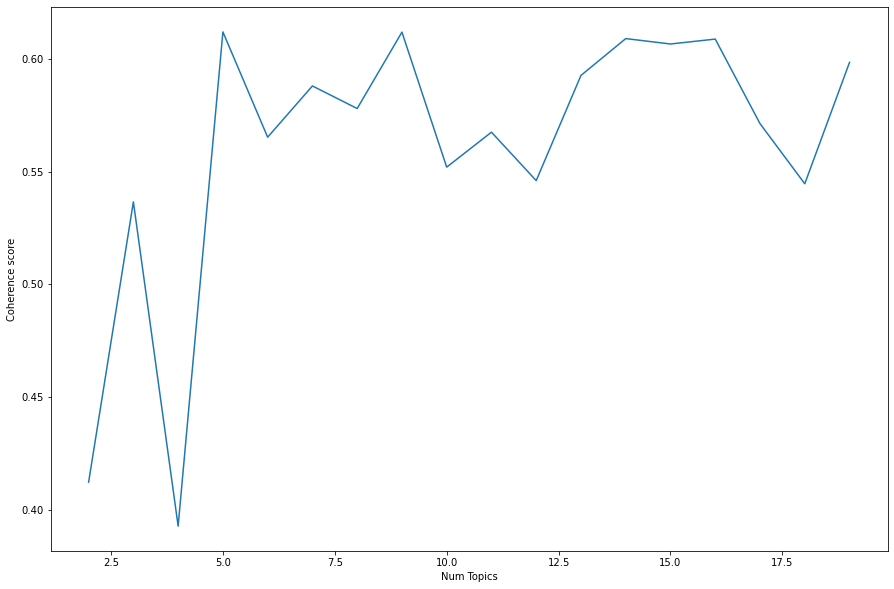

In [16]:
# show graph
x = range(start, limit, step)
plt.figure(figsize=(15, 10))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [17]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 2  has Coherence Value of 0.412331
Num Topics = 3  has Coherence Value of 0.536631
Num Topics = 4  has Coherence Value of 0.392833
Num Topics = 5  has Coherence Value of 0.611992
Num Topics = 6  has Coherence Value of 0.565301
Num Topics = 7  has Coherence Value of 0.588029
Num Topics = 8  has Coherence Value of 0.578011
Num Topics = 9  has Coherence Value of 0.611892
Num Topics = 10  has Coherence Value of 0.552023
Num Topics = 11  has Coherence Value of 0.56753
Num Topics = 12  has Coherence Value of 0.546045
Num Topics = 13  has Coherence Value of 0.592698
Num Topics = 14  has Coherence Value of 0.609029
Num Topics = 15  has Coherence Value of 0.606633
Num Topics = 16  has Coherence Value of 0.608809
Num Topics = 17  has Coherence Value of 0.571311
Num Topics = 18  has Coherence Value of 0.544651
Num Topics = 19  has Coherence Value of 0.598478


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Building LDA Model = LDA Model removing my_stop_words & featuring 30 topics
lda_model_optimal = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
pprint(lda_model_optimal.print_topics(num_topics=5, num_words=15))
doc_lda = lda_model_optimal[corpus]

[(0,
  '0.098*"expired" + 0.049*"device" + 0.041*"mouth" + 0.033*"disk" + '
  '0.018*"fluticasone" + 0.017*"salmeterol" + 0.013*"rehabilitation" + '
  '0.013*"deceased" + 0.013*"inhaler" + 0.011*"respiratory" + 0.010*"aneurysm" '
  '+ 0.010*"ventricular" + 0.010*"post" + 0.010*"amiodarone" + '
  '0.010*"tachycardia"'),
 (1,
  '0.023*"flush" + 0.018*"intravenous" + 0.016*"drop" + 0.015*"line" + '
  '0.013*"soln" + 0.013*"recon" + 0.013*"tube" + 0.013*"appl" + 0.013*"sust" + '
  '0.011*"dissolve" + 0.010*"ophthalmic" + 0.010*"vancomycin" + 0.010*"year" + '
  '0.009*"rapid" + 0.009*"suppository"'),
 (2,
  '0.014*"fracture" + 0.012*"medicine" + 0.012*"stool" + 0.011*"bowel" + '
  '0.009*"seizure" + 0.008*"site" + 0.008*"because" + 0.008*"resume" + '
  '0.008*"avoid" + 0.007*"narcotic" + 0.007*"small" + 0.007*"degree" + '
  '0.007*"removed" + 0.007*"nurse" + 0.006*"getting"'),
 (3,
  '0.016*"patch" + 0.008*"start" + 0.008*"lung" + 0.007*"hold" + '
  '0.006*"prednisone" + 0.006*"given" + 0.0

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_optimal.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_optimal, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.278507188221579

Coherence Score:  0.4517798438349404


In [22]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_optimal, corpus, id2word)
vis

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Applications/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.070647  0.100126       1        1  35.300491
1      0.176899 -0.147816       2        1  21.937253
4      0.029000 -0.274807       3        1  17.624054
2      0.125293  0.297148       4        1  17.603098
0     -0.401839  0.025349       5        1   7.535104, topic_info=           Term          Freq         Total Category  logprob  loglift
158     expired  11305.000000  11305.000000  Default  30.0000  30.0000
403      device   5599.000000   5599.000000  Default  29.0000  29.0000
228       mouth   6614.000000   6614.000000  Default  28.0000  28.0000
105       flush   7651.000000   7651.000000  Default  27.0000  27.0000
404        disk   3823.000000   3823.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
332  amiodarone   1134.311873   3180.875720   Topic5  -4.6184   1.5545
884        post   1136.195605   3361.105017   Topic5  -4.6167   1.5010
191   nebulizer    741.930520   1170.593800   Topic5  -5.0429   2.1296
202   pulmonary    838.330999   3256.324598   Topic5  -4.9208   1.2287
246        copd    722.191849   1655.074331   Topic5  -5.0699   1.7563

[263 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
427       1  0.668083  abdominal
427       2  0.267145  abdominal
427       4  0.064696  abdominal
159       3  0.999591       able
1410      1  0.999647   adhesive
...     ...       ...        ...
1194      3  0.999339       wear
8         3  0.999703      weigh
986       3  0.999498    written
155       2  0.980761       year
155       3  0.018958       year

[336 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 3, 1])

## Creating Vectors For Probabilities {-}

In [23]:
#lda_output = lda_model_optimal.transform(corpus)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
vector = lda_model_optimal[corpus]  # get topic probability distribution for a document

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
vector

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
def Extract(vector):
    return [item[0] for item in vector]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
vector_prob = Extract(vector)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
vector_prob

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 0.066370495),
  (1, 0.104789816),
  (2, 0.04975242),
  (3, 0.5334259),
  (4, 0.24566135)],
 [(0, 0.013772663),
  (1, 0.6209554),
  (2, 0.06588145),
  (3, 0.2441031),
  (4, 0.05528736)],
 [(1, 0.035221536), (2, 0.014628898), (3, 0.7539345), (4, 0.18862411)],
 [(0, 0.02190794),
  (1, 0.05654221),
  (2, 0.054371662),
  (3, 0.7680425),
  (4, 0.099135675)],
 [(0, 0.03310497),
  (1, 0.07541122),
  (2, 0.17262807),
  (3, 0.65234107),
  (4, 0.06651473)],
 [(0, 0.06252241),
  (1, 0.7187151),
  (2, 0.023128979),
  (3, 0.13205425),
  (4, 0.06357929)],
 [(0, 0.02639215),
  (1, 0.34369323),
  (2, 0.012105179),
  (3, 0.3421236),
  (4, 0.27568582)],
 [(0, 0.5117266),
  (1, 0.13243864),
  (2, 0.07563148),
  (3, 0.1818971),
  (4, 0.09830618)],
 [(0, 0.036601212),
  (1, 0.3217644),
  (2, 0.024454776),
  (3, 0.43481532),
  (4, 0.1823643)],
 [(0, 0.651379),
  (1, 0.08869907),
  (2, 0.014175968),
  (3, 0.22330837),
  (4, 0.02243755)],
 [(0, 0.012406098),
  (1, 0.16211663),
  (2, 0.048869077),
  (3, 0

## Align Index With Column Titles {-}

In [29]:
vector_prob_df = pd.DataFrame(vector_prob, columns=[0,1,2,3,4])
vector_prob_df.head()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4
0,"(0, 0.066370495)","(1, 0.104789816)","(2, 0.04975242)","(3, 0.5334259)","(4, 0.24566135)"
1,"(0, 0.013772663)","(1, 0.6209554)","(2, 0.06588145)","(3, 0.2441031)","(4, 0.05528736)"
2,"(1, 0.035221536)","(2, 0.014628898)","(3, 0.7539345)","(4, 0.18862411)",None
3,"(0, 0.02190794)","(1, 0.05654221)","(2, 0.054371662)","(3, 0.7680425)","(4, 0.099135675)"
4,"(0, 0.03310497)","(1, 0.07541122)","(2, 0.17262807)","(3, 0.65234107)","(4, 0.06651473)"


In [30]:
def clean_df(df):
    #Create empty dataframe copy
    df2 = pd.DataFrame(np.zeros(df.shape), columns = df.columns)
    nrows = df.shape[0]
    ncolumns = df.shape[1]
    #Populate empty dataframe
    for i in range(nrows):
        #Create key:value pair of each row
        rowdict = dict(zip([x[0] for x in df.iloc[i] if x != None], [x[1] for x in df.iloc[i] if x != None]))
        #Populate row based off of 
        for j in range(ncolumns):
            if j in rowdict.keys():
                df2.iloc[i][j] = rowdict[j]
            else:
                df2.iloc[i][j] = None
    return df2

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
vector_prob_df_align = clean_df(vector_prob_df)
vector_prob_df_align.head()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4
0,0.066370,0.104790,0.049752,0.533426,0.245661
1,0.013773,0.620955,0.065881,0.244103,0.055287
2,NaN,0.035222,0.014629,0.753935,0.188624
3,0.021908,0.056542,0.054372,0.768043,0.099136
4,0.033105,0.075411,0.172628,0.652341,0.066515


In [32]:
vector_prob_df_align.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31977 entries, 0 to 31976
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       28021 non-null  float64
 1   1       31970 non-null  float64
 2   2       31423 non-null  float64
 3   3       31977 non-null  float64
 4   4       31886 non-null  float64
dtypes: float64(5)
memory usage: 1.2 MB


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
vector_prob_df_align

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4
0,0.066370,0.104790,0.049752,0.533426,0.245661
1,0.013773,0.620955,0.065881,0.244103,0.055287
2,NaN,0.035222,0.014629,0.753935,0.188624
3,0.021908,0.056542,0.054372,0.768043,0.099136
4,0.033105,0.075411,0.172628,0.652341,0.066515
...,...,...,...,...,...
31972,0.098157,0.244615,0.139692,0.335965,0.181572
31973,0.085020,0.394433,0.018571,0.105397,0.396579
31974,0.014437,0.472601,0.098297,0.374091,0.040574
31975,0.602803,0.107735,0.061524,0.147968,0.079969


In [34]:
topics = vector_prob_df_align
labels = topic_modeling_df['ICD9_CODE']
age = topic_modeling_df['AGE_recalculated']

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
topic_modeling_results = pd.concat([age, labels, topics], axis=1)
topic_modeling_results

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AGE_recalculated,ICD9_CODE,0,1,2,3,4
0,51,5849,0.066370,0.104790,0.049752,0.533426,0.245661
1,56,51881,0.013773,0.620955,0.065881,0.244103,0.055287
2,300,5849,NaN,0.035222,0.014629,0.753935,0.188624
3,70,51881,0.021908,0.056542,0.054372,0.768043,0.099136
4,68,51881,0.033105,0.075411,0.172628,0.652341,0.066515
...,...,...,...,...,...,...,...
31972,79,4019,0.098157,0.244615,0.139692,0.335965,0.181572
31973,73,53081,0.085020,0.394433,0.018571,0.105397,0.396579
31974,61,53081,0.014437,0.472601,0.098297,0.374091,0.040574
31975,51,4019,0.602803,0.107735,0.061524,0.147968,0.079969


In [36]:
topic_modeling_results.isna().sum()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AGE_recalculated       0
ICD9_CODE              0
0                   3956
1                      7
2                    554
3                      0
4                     91
dtype: int64

In [37]:
topic_modeling_results = topic_modeling_results.fillna(0)
topic_modeling_results

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AGE_recalculated,ICD9_CODE,0,1,2,3,4
0,51,5849,0.066370,0.104790,0.049752,0.533426,0.245661
1,56,51881,0.013773,0.620955,0.065881,0.244103,0.055287
2,300,5849,0.000000,0.035222,0.014629,0.753935,0.188624
3,70,51881,0.021908,0.056542,0.054372,0.768043,0.099136
4,68,51881,0.033105,0.075411,0.172628,0.652341,0.066515
...,...,...,...,...,...,...,...
31972,79,4019,0.098157,0.244615,0.139692,0.335965,0.181572
31973,73,53081,0.085020,0.394433,0.018571,0.105397,0.396579
31974,61,53081,0.014437,0.472601,0.098297,0.374091,0.040574
31975,51,4019,0.602803,0.107735,0.061524,0.147968,0.079969


In [38]:
topic_modeling_results.isna().sum()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AGE_recalculated    0
ICD9_CODE           0
0                   0
1                   0
2                   0
3                   0
4                   0
dtype: int64

## Conforming AGE>100 to 90 {-}

In [39]:
topic_modeling_results[topic_modeling_results['AGE_recalculated']>100]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AGE_recalculated,ICD9_CODE,0,1,2,3,4
2,300,5849,0.000000,0.035222,0.014629,0.753935,0.188624
5,300,51881,0.062522,0.718715,0.023129,0.132054,0.063579
7,300,5849,0.511727,0.132439,0.075631,0.181897,0.098306
30,299,5849,0.064621,0.037111,0.034461,0.835635,0.028172
37,300,5849,0.043952,0.078250,0.134786,0.683640,0.059371
...,...,...,...,...,...,...,...
31768,300,4019,0.034079,0.285148,0.105131,0.491678,0.083964
31833,304,4019,0.000000,0.681680,0.068517,0.217356,0.023823
31885,308,53081,0.068081,0.199530,0.149619,0.433994,0.148776
31935,300,53081,0.010652,0.156016,0.245317,0.393352,0.194664


In [40]:
topic_modeling_results['AGE_recalculated'] = np.where((topic_modeling_results.AGE_recalculated > 100), 90,topic_modeling_results.AGE_recalculated)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
topic_modeling_results[topic_modeling_results['AGE_recalculated']>100]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AGE_recalculated,ICD9_CODE,0,1,2,3,4


In [42]:
topic_modeling_results['AGE_recalculated'].value_counts()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


90    1951
78     802
76     799
80     796
77     788
      ... 
0       13
18      12
17       5
16       2
89       2
Name: AGE_recalculated, Length: 76, dtype: int64

## Saving to CSV File {-}

In [43]:
topic_modeling_results.to_csv('mimic_data_tm_discharge_5_topics.csv', index=False)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Extracting Topic Words {-}

In [ ]:
# topic_words = lda_model_optimal.print_topics(num_topics=11, num_words=6)
# topic_words

In [ ]:
# type(topic_words)

In [ ]:
# def clean_txt(txt):
#     #remove text
#     txt = txt.replace("\n",' ')
#     #txt = txt.replace(remove_words, ' ')
#     #punctuation
#     txt = re.sub(r'[^\w\s]', ' ', txt)
#     #numbers removing
#     txt=''.join(i for i in txt if not i.isdigit())
#     TAG_RE = re.compile(r'<[^>]+>') 
#     txt = TAG_RE.sub('', txt.lower())
#     #tokenization of words
#     txt = word_tokenize(txt)
#     return txt

In [ ]:
# topic_words = str(topic_words)
# topic_words

In [ ]:
# topic_words_list = clean_txt(topic_words)
# topic_words_list

In [ ]:
# type(topic_words_list)

In [ ]:
# topic_words_list_series = pd.Series(topic_words_list)
# topic_words_list_series

In [ ]:
# topic_words_list_series.to_csv('topic_words_list_series_top_6_words_age_filtered.csv', index=False)